In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# === 1. Leitura de dados ===
df_peic = pd.read_excel("Serie_historica_PEIC (1).xlsx")
df_bcb = pd.read_csv("endividamentofamilias_bcb.csv.csv", encoding="latin1", delimiter=";")
print(df_peic)
print(df_bcb)

                                           Unnamed: 0  2024-06-01 00:00:00  \
0       Familias Endividadas (% do total de famílias)             0.788355   
1   Familias com dívidas em atraso (% do total de ...             0.288111   
2   Não terão condição de pagar dívidas em atraso ...             0.120011   
3                      Tipo de dívida (% endividados)                  NaN   
4                                   Cartão de crédito             0.863722   
5                                     Cheque especial             0.037413   
6                                   Cheque pré-datado             0.006312   
7                                  Crédito consignado             0.056424   
8                                     Crédito pessoal             0.099284   
9                                              Carnês             0.159707   
10                             Financiamento de carro             0.083908   
11                              Financiamento de casa           

In [ ]:
# === 2. Tratar dados da PEIC ===
df_peic = df_peic.set_index("Unnamed: 0").T
df_peic.index = pd.to_datetime(df_peic.index)  # transformar colunas de datas em datetime
df_peic.columns.name = None

In [ ]:
# === 2.1 Renomear colunas da PEIC ===
df_peic = df_peic.rename(columns={
    "Familias Endividadas (% do total de famílias)": "PEIC_Endividados",
    "Familias com dívidas em atraso (% do total de famílias)": "PEIC_Inadimplentes",
    "Não terão condição de pagar dívidas em atraso (% do total de famílias)": "PEIC_SemCondicao",
})

In [ ]:
# Manter apenas as colunas de interesse
df_peic = df_peic[["PEIC_Endividados", "PEIC_Inadimplentes", "PEIC_SemCondicao", "Cartão de crédito"]]
df_peic = df_peic.reset_index().rename(columns={"index": "Data"})
print(df_peic)

         Data  PEIC_Endividados  PEIC_Inadimplentes  PEIC_SemCondicao  \
0  2024-06-01          0.788355            0.288111          0.120011   
1  2024-07-01          0.784994            0.288202          0.119178   
2  2024-08-01          0.779870            0.288293          0.120932   
3  2024-09-01          0.772459            0.289838          0.124364   
4  2024-10-01          0.768942            0.292507          0.126089   
5  2024-11-01          0.769757            0.293910          0.129319   
6  2024-12-01          0.766613            0.293252          0.129764   
7  2025-01-01          0.761220            0.291161          0.126658   
8  2025-02-01          0.764462            0.286152          0.122862   
9  2025-03-01          0.770913            0.285692          0.121555   
10 2025-04-01          0.776037            0.291121          0.123571   
11 2025-05-01          0.782061            0.295184          0.125023   
12 2025-06-01          0.783959            0.295266

In [ ]:
# === 3. Tratar dados do BCB ===
df_bcb.columns = ["Data", "BCB_Endividamento"]
df_bcb["Data"] = pd.to_datetime(df_bcb["Data"], format="%m/%Y", errors="coerce")
df_bcb = df_bcb[df_bcb["BCB_Endividamento"] != "BCB-DSTAT"].copy()
df_bcb["BCB_Endividamento"] = df_bcb["BCB_Endividamento"].astype(str).str.replace(",", ".").astype(float)
df_bcb = df_bcb.dropna(subset=["Data"])
print(df_bcb)

          Data  BCB_Endividamento
0   2005-01-01              16.51
1   2005-02-01              16.84
2   2005-03-01              17.20
3   2005-04-01              17.60
4   2005-05-01              17.96
..         ...                ...
240 2025-01-01              48.63
241 2025-02-01              48.60
242 2025-03-01              48.95
243 2025-04-01              48.93
244 2025-05-01              48.97

[245 rows x 2 columns]


In [ ]:
# === 4. Mesclar dados dos 2 dataframes ===
df_join_PEIC_BCB = pd.merge(df_peic, df_bcb, on="Data", how="inner")

In [ ]:
# === 5. Ver resultado ===
print(df_join_PEIC_BCB.head())

        Data  PEIC_Endividados  PEIC_Inadimplentes  PEIC_SemCondicao  \
0 2024-06-01          0.788355            0.288111          0.120011   
1 2024-07-01          0.784994            0.288202          0.119178   
2 2024-08-01          0.779870            0.288293          0.120932   
3 2024-09-01          0.772459            0.289838          0.124364   
4 2024-10-01          0.768942            0.292507          0.126089   

   Cartão de crédito  BCB_Endividamento  
0           0.863722              47.69  
1           0.860201              47.85  
2           0.856701              48.00  
3           0.843869              48.03  
4           0.835288              48.09  


In [ ]:
# === 6. Criar um DF com principais valores (média, mediana, desvio padrão)
df_descricao = df_join_PEIC_BCB.describe().loc[['mean', '50%', 'std']]
df_descricao.rename(index={'50%': 'mediana', 'mean': 'média', 'std': 'desvio padrão'}, inplace=True)

# Criar transposição de df's
df_descricao_transposto = df_descricao.T

# Mostrar tabela
display(df_descricao_transposto)

,média,mediana,desvio padrão
Data,2024-11-15 14:00:00,2024-11-16 00:00:00,NaN
PEIC_Endividados,0.773807,0.771686,0.008498
PEIC_Inadimplentes,0.290285,0.290479,0.003071
PEIC_SemCondicao,0.12411,0.123968,0.003438
Cartão de crédito,0.843757,0.838445,0.010246
BCB_Endividamento,48.373333,48.37,0.447606


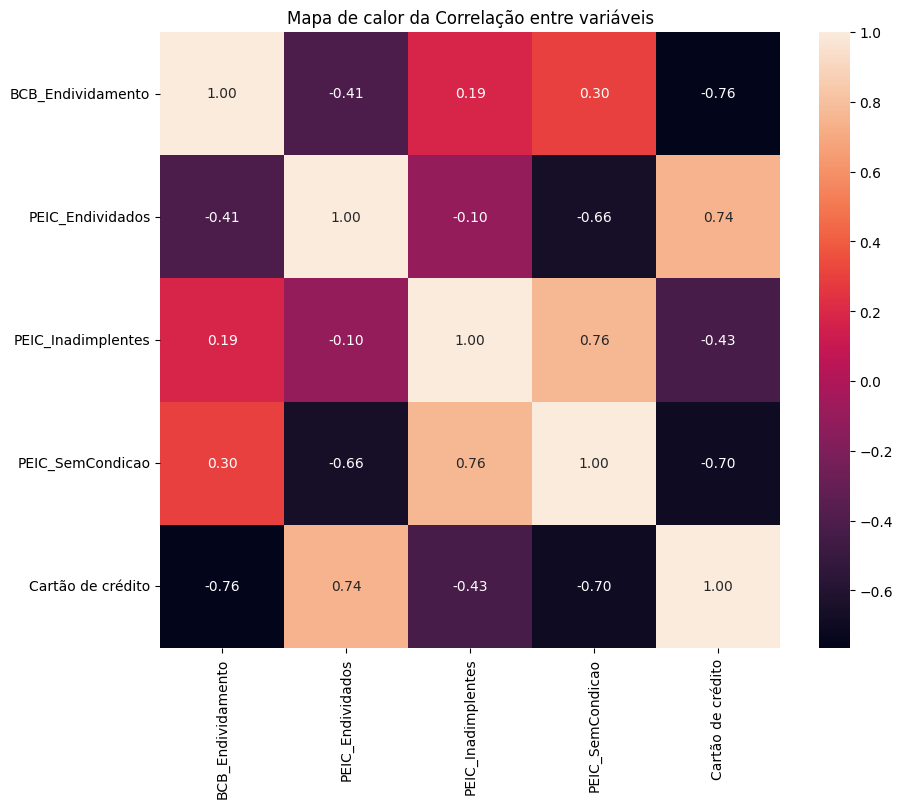

In [ ]:
df_corr = df_join_PEIC_BCB[['BCB_Endividamento','PEIC_Endividados','PEIC_Inadimplentes','PEIC_SemCondicao', "Cartão de crédito"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, fmt=".2f")
plt.title("Mapa de calor da Correlação entre variáveis")
plt.savefig('Correlacao entre var.png')
plt.show()

In [ ]:
df_join_PEIC_BCB.to_csv("PEIC_BCB_att.csv", index=False)